## Resume Classification
### Business objective:
* **The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention**

## 1. Import Library

In [2]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install stopwords

In [4]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install docx2txt

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install textblob


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/626.3 kB ? eta -:--:--
   ---------------------------------------- 626.3/626.3 kB 5.9 MB/s eta 0:00:00


In [11]:
import os
import spacy
import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [15]:
file_path   = r'C:/Users/solas/Downloads/Project-Resume-Classification-main (1)/Project-Resume-Classification-main/Dataset/Resumes/'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

## 2. Exctract the Text from Dataset

In [16]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  79


In [17]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

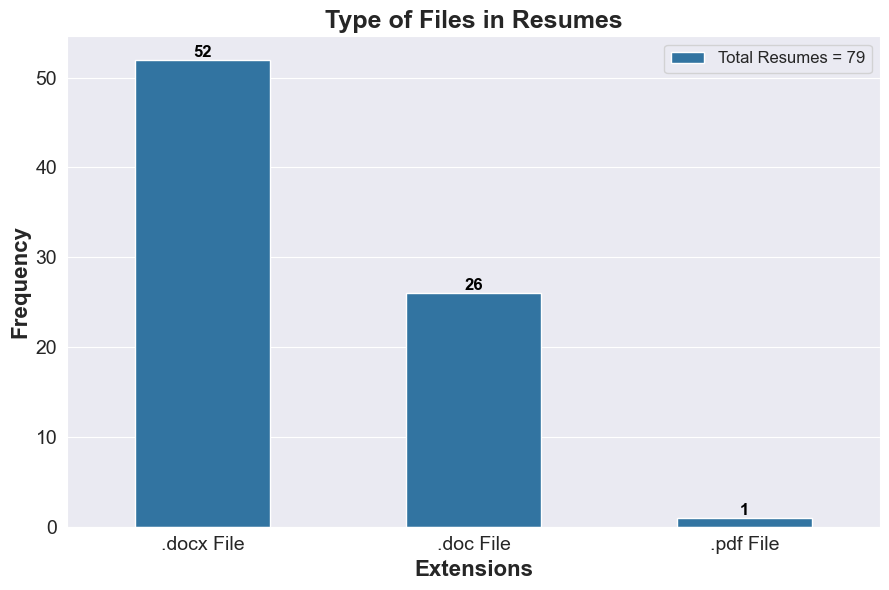

In [22]:
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()


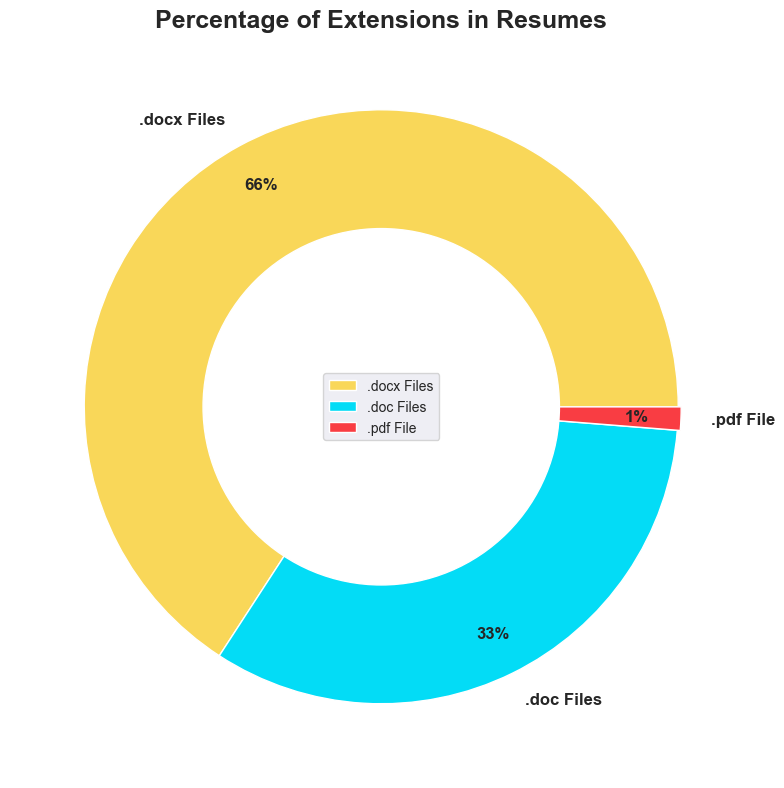

In [20]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85,
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()


In [23]:
file_path = r'C:/Users/solas/Downloads/Project-Resume-Classification-main (1)/Project-Resume-Classification-main/Dataset/Resumes/'
file_name = []
profile   = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)

In [24]:
resume_data = pd.DataFrame()
resume_data['Category'] = profile
resume_data['Resume_Details'] = file_name
resume_data

Category                          Resume_Details
0   PeopleSoft      Peoplesoft Admin_AnubhavSingh.docx
1   PeopleSoft    Peoplesoft Admin_G Ananda Rayudu.doc
2   PeopleSoft         Peoplesoft Admin_Gangareddy.doc
3   PeopleSoft            Peoplesoft Admin_Murali.docx
4   PeopleSoft  Peoplesoft Admin_Priyanka Ramadoss.doc
..         ...                                     ...
74     Workday              Sri Krishna S_Hexaware.doc
75     Workday                  Srikanth-Hexaware.docx
76     Workday                   SSKumar_Hexaware.docx
77     Workday            Venkateswarlu B_Hexaware.doc
78     Workday               Vinay Kumar_Hexaware.docx

[79 rows x 2 columns]

In [28]:
pip install files

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for files: filename=files-1.1.1-py3-none-any.whl size=3656 sha256=21850e24ed510ae1e28013fa8987d7fc9b25ac087049fba76f11ab95c0930163
  Stored in directory: c:\users\solas\appdata\local\pip\cache\wheels\7b\5a\b5\b363f1d4d991bd2a9199fd2bf46574a5477c0c7f8a22881848
Successfully built files
Note: you may need to restart the kernel to use updated packages.


In [31]:
resume_data.Category.value_counts().index

Index(['React JS Developer', 'Workday', 'PeopleSoft', 'SQL Developer'], dtype='object')

## 3. Create a DataFrame

In [11]:
resume_data = data1.append([data2, data3, data4], ignore_index = True)
resume_data

Raw_Details   Category1 Category2  \
0   Anubhav Kumar Singh\n\n\n\n To work in a globa...  PeopleSoft       NaN   
1   G. Ananda Rayudu \n https://www.linkedin.com/i...  PeopleSoft       NaN   
2   PeopleSoft Database Administrator \n\nGangared...  PeopleSoft       NaN   
3   Classification: Internal \n\nMurali \n\nExperi...  PeopleSoft       NaN   
4   Priyanka Ramadoss\n\n61/46, MountPleasant, \nC...  PeopleSoft       NaN   
..                                                ...         ...       ...   
74  Workday Integration Consultant \n\nName       ...         NaN       NaN   
75  S R I K A N T H  ( W O R K D A Y  H C M  C O N...         NaN       NaN   
76  WORKDAY | HCM | FCM \n\nName Role \n\n: Kumar ...         NaN       NaN   
77  Venkateswarlu.B \n\n\n\nWorkday Consultant\n\n...         NaN       NaN   
78  VINAY KUMAR .V \nWORKDAY FUNCTIONAL CONSULTANT...         NaN       NaN   

   Category3 Category4  
0        NaN       NaN  
1        NaN       NaN  
2        NaN       NaN  
3        NaN       NaN  
4        NaN       NaN  
..       ...       ...  
74       NaN   Workday  
75       NaN   Workday  
76       NaN   Workday  
77       NaN   Workday  
78       NaN   Workday  

[79 rows x 5 columns]

In [32]:
resume_data.Category.value_counts()

React JS Developer    24
Workday               21
PeopleSoft            20
SQL Developer         14
Name: Category, dtype: int64

### 3.1 Merge all Unnecessary column in One Column

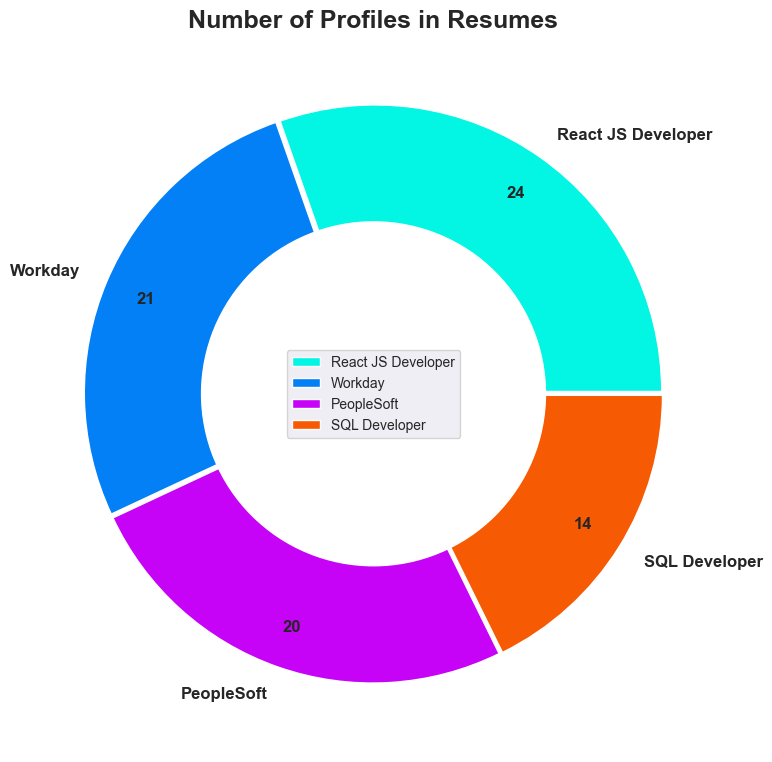

In [33]:
fig = plt.figure(figsize=(8,8))

sizes = resume_data.Category.value_counts()
labels = resume_data.Category.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
# fig.savefig('/content/sample_data/IMG/No_Resume_Pai', dpi = 500)

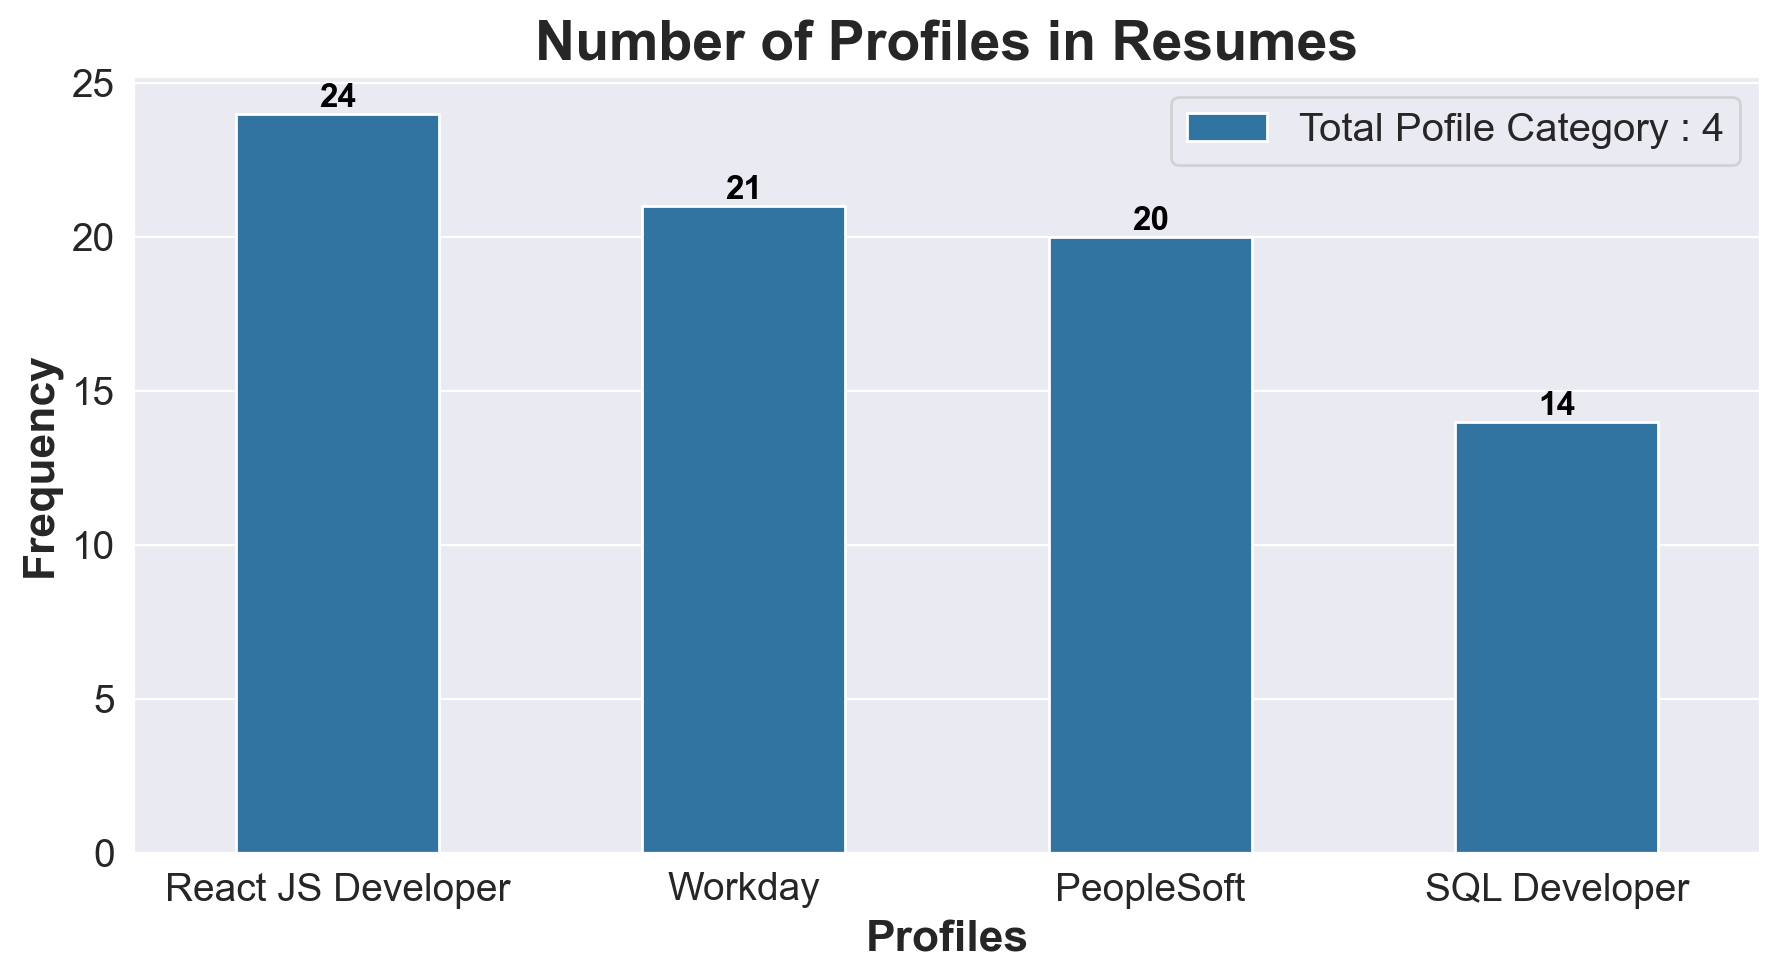

In [34]:
fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)
# ax = sns.barplot(x= resume_data.Category.value_counts().index, y= resume_data.Category.value_counts(), width=0.5,
#                  data= resume_data, ax= axe, label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

ax = sns.barplot(x= resume_data.Category.value_counts().index, y= resume_data.Category.value_counts(), width=0.5,
                  ax= axe, label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))
axe.set_xlabel('Profiles', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Number of Profiles in Resumes', fontsize= 20, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()


### 3.2 Final Dataset

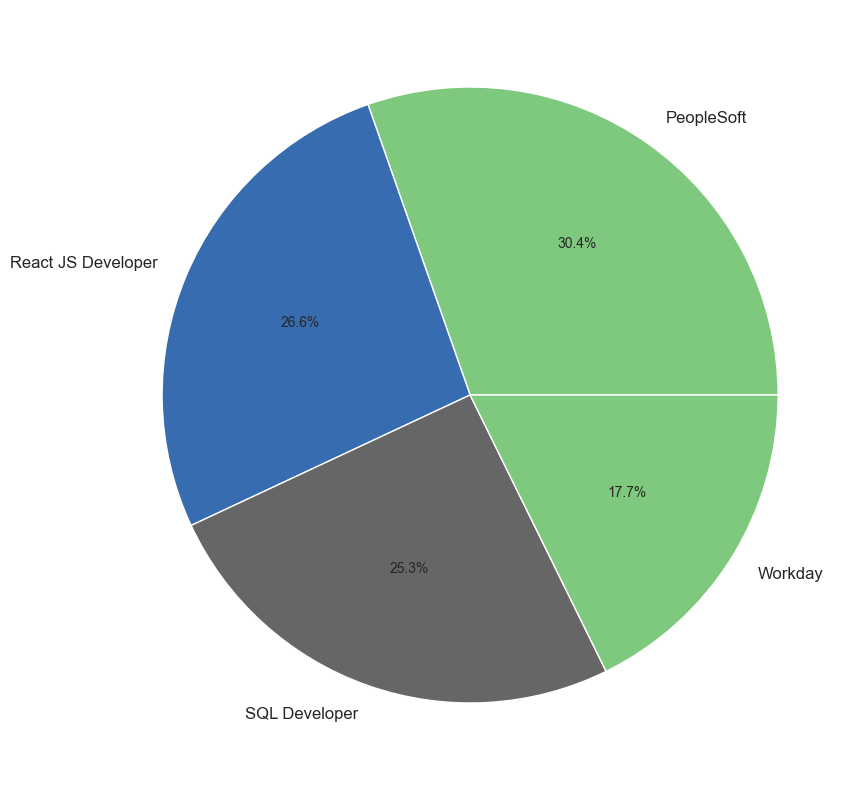

In [73]:
counts = resume_data["Category"].value_counts()
labels = resume_data["Category"].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels=labels, autopct="%1.1f%%", colors=plt.cm.Accent(np.linspace(0,1,3)))
plt.show()

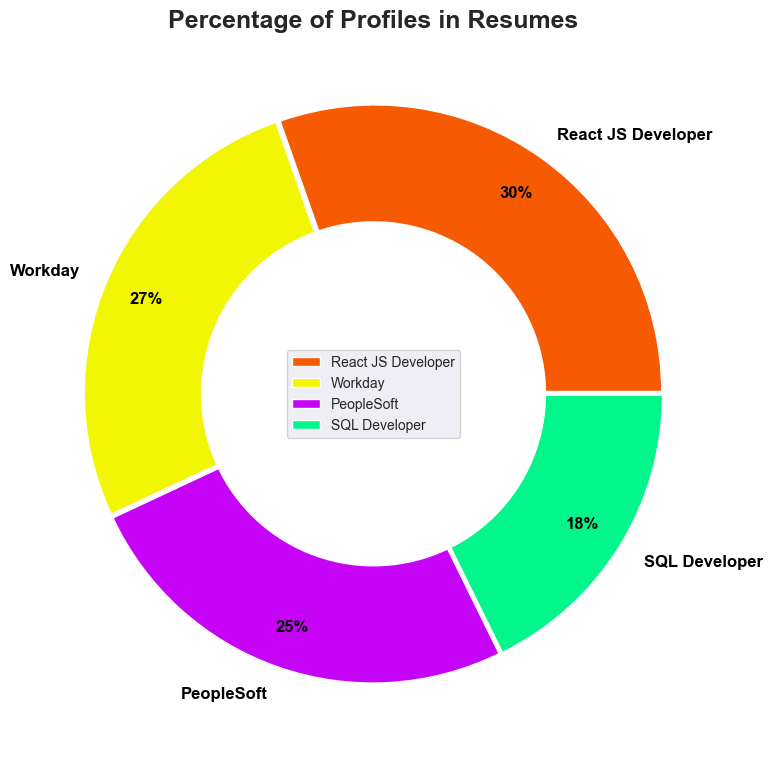

In [35]:
fig = plt.figure(figsize=(8,8),dpi=100)

sizes = resume_data.Category.value_counts()
labels = resume_data.Category.value_counts().index
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode,
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()


### 3.3 Save new CSV File

In [39]:
# resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

Category                          Resume_Details
0   PeopleSoft      Peoplesoft Admin_AnubhavSingh.docx
1   PeopleSoft    Peoplesoft Admin_G Ananda Rayudu.doc
2   PeopleSoft         Peoplesoft Admin_Gangareddy.doc
3   PeopleSoft            Peoplesoft Admin_Murali.docx
4   PeopleSoft  Peoplesoft Admin_Priyanka Ramadoss.doc
..         ...                                     ...
74     Workday              Sri Krishna S_Hexaware.doc
75     Workday                  Srikanth-Hexaware.docx
76     Workday                   SSKumar_Hexaware.docx
77     Workday            Venkateswarlu B_Hexaware.doc
78     Workday               Vinay Kumar_Hexaware.docx

[79 rows x 2 columns]

## 4. Data Understanding

In [40]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\solas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\solas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\solas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
resume_data['Resume_Details']

0         Peoplesoft Admin_AnubhavSingh.docx
1       Peoplesoft Admin_G Ananda Rayudu.doc
2            Peoplesoft Admin_Gangareddy.doc
3               Peoplesoft Admin_Murali.docx
4     Peoplesoft Admin_Priyanka Ramadoss.doc
                       ...                  
74                Sri Krishna S_Hexaware.doc
75                    Srikanth-Hexaware.docx
76                     SSKumar_Hexaware.docx
77              Venkateswarlu B_Hexaware.doc
78                 Vinay Kumar_Hexaware.docx
Name: Resume_Details, Length: 79, dtype: object

In [43]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

### 4.1 Number of Words in each Resume

In [44]:
df_ngram.head(20)

Frequency           Unigram_Bigram
0          52                     docx
1          26                      doc
2          22                    react
3          20               peoplesoft
4          11                 react js
5          11                       js
6           2                    reddy
7           2  react developer_krishna
8           2                   lokesh
9           2                    kumar
10          2                  krishna
11          2           js developer_m
12          2               internship
13          2            hexaware docx
14          2                 hexaware
15          2       developer_m lokesh
16          2              developer_m
17          2        developer_krishna
18          1               vinod docx
19          1                    vinod

### 4.2 Number of Characters

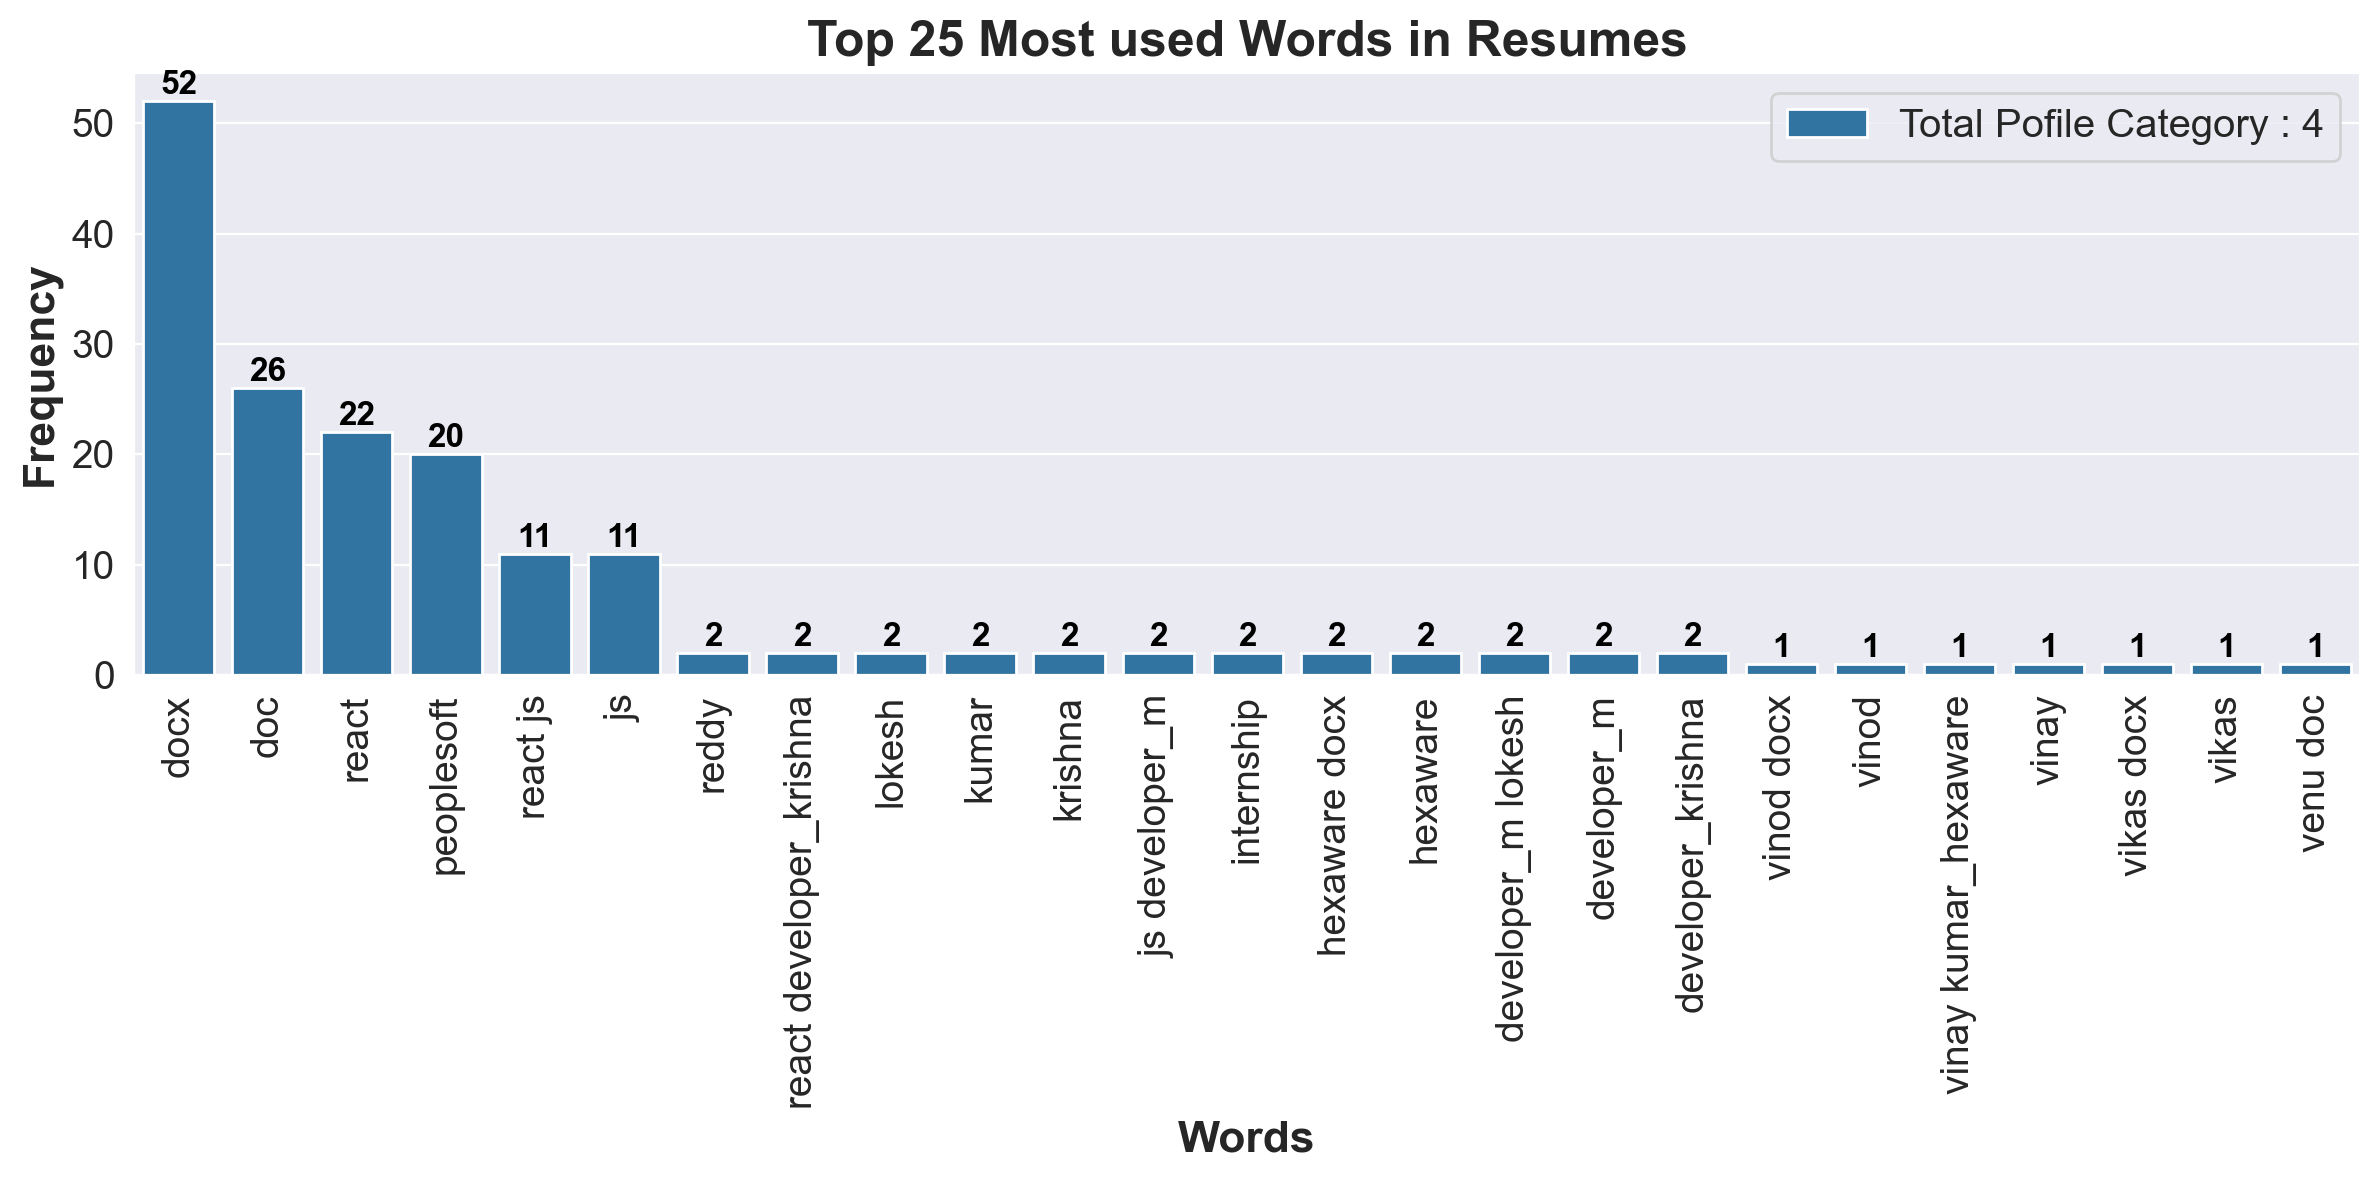

In [45]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
# fig.savefig('IMG/Top_Words_Bar', dpi = 500)

### 4.3 Number of Stopwords

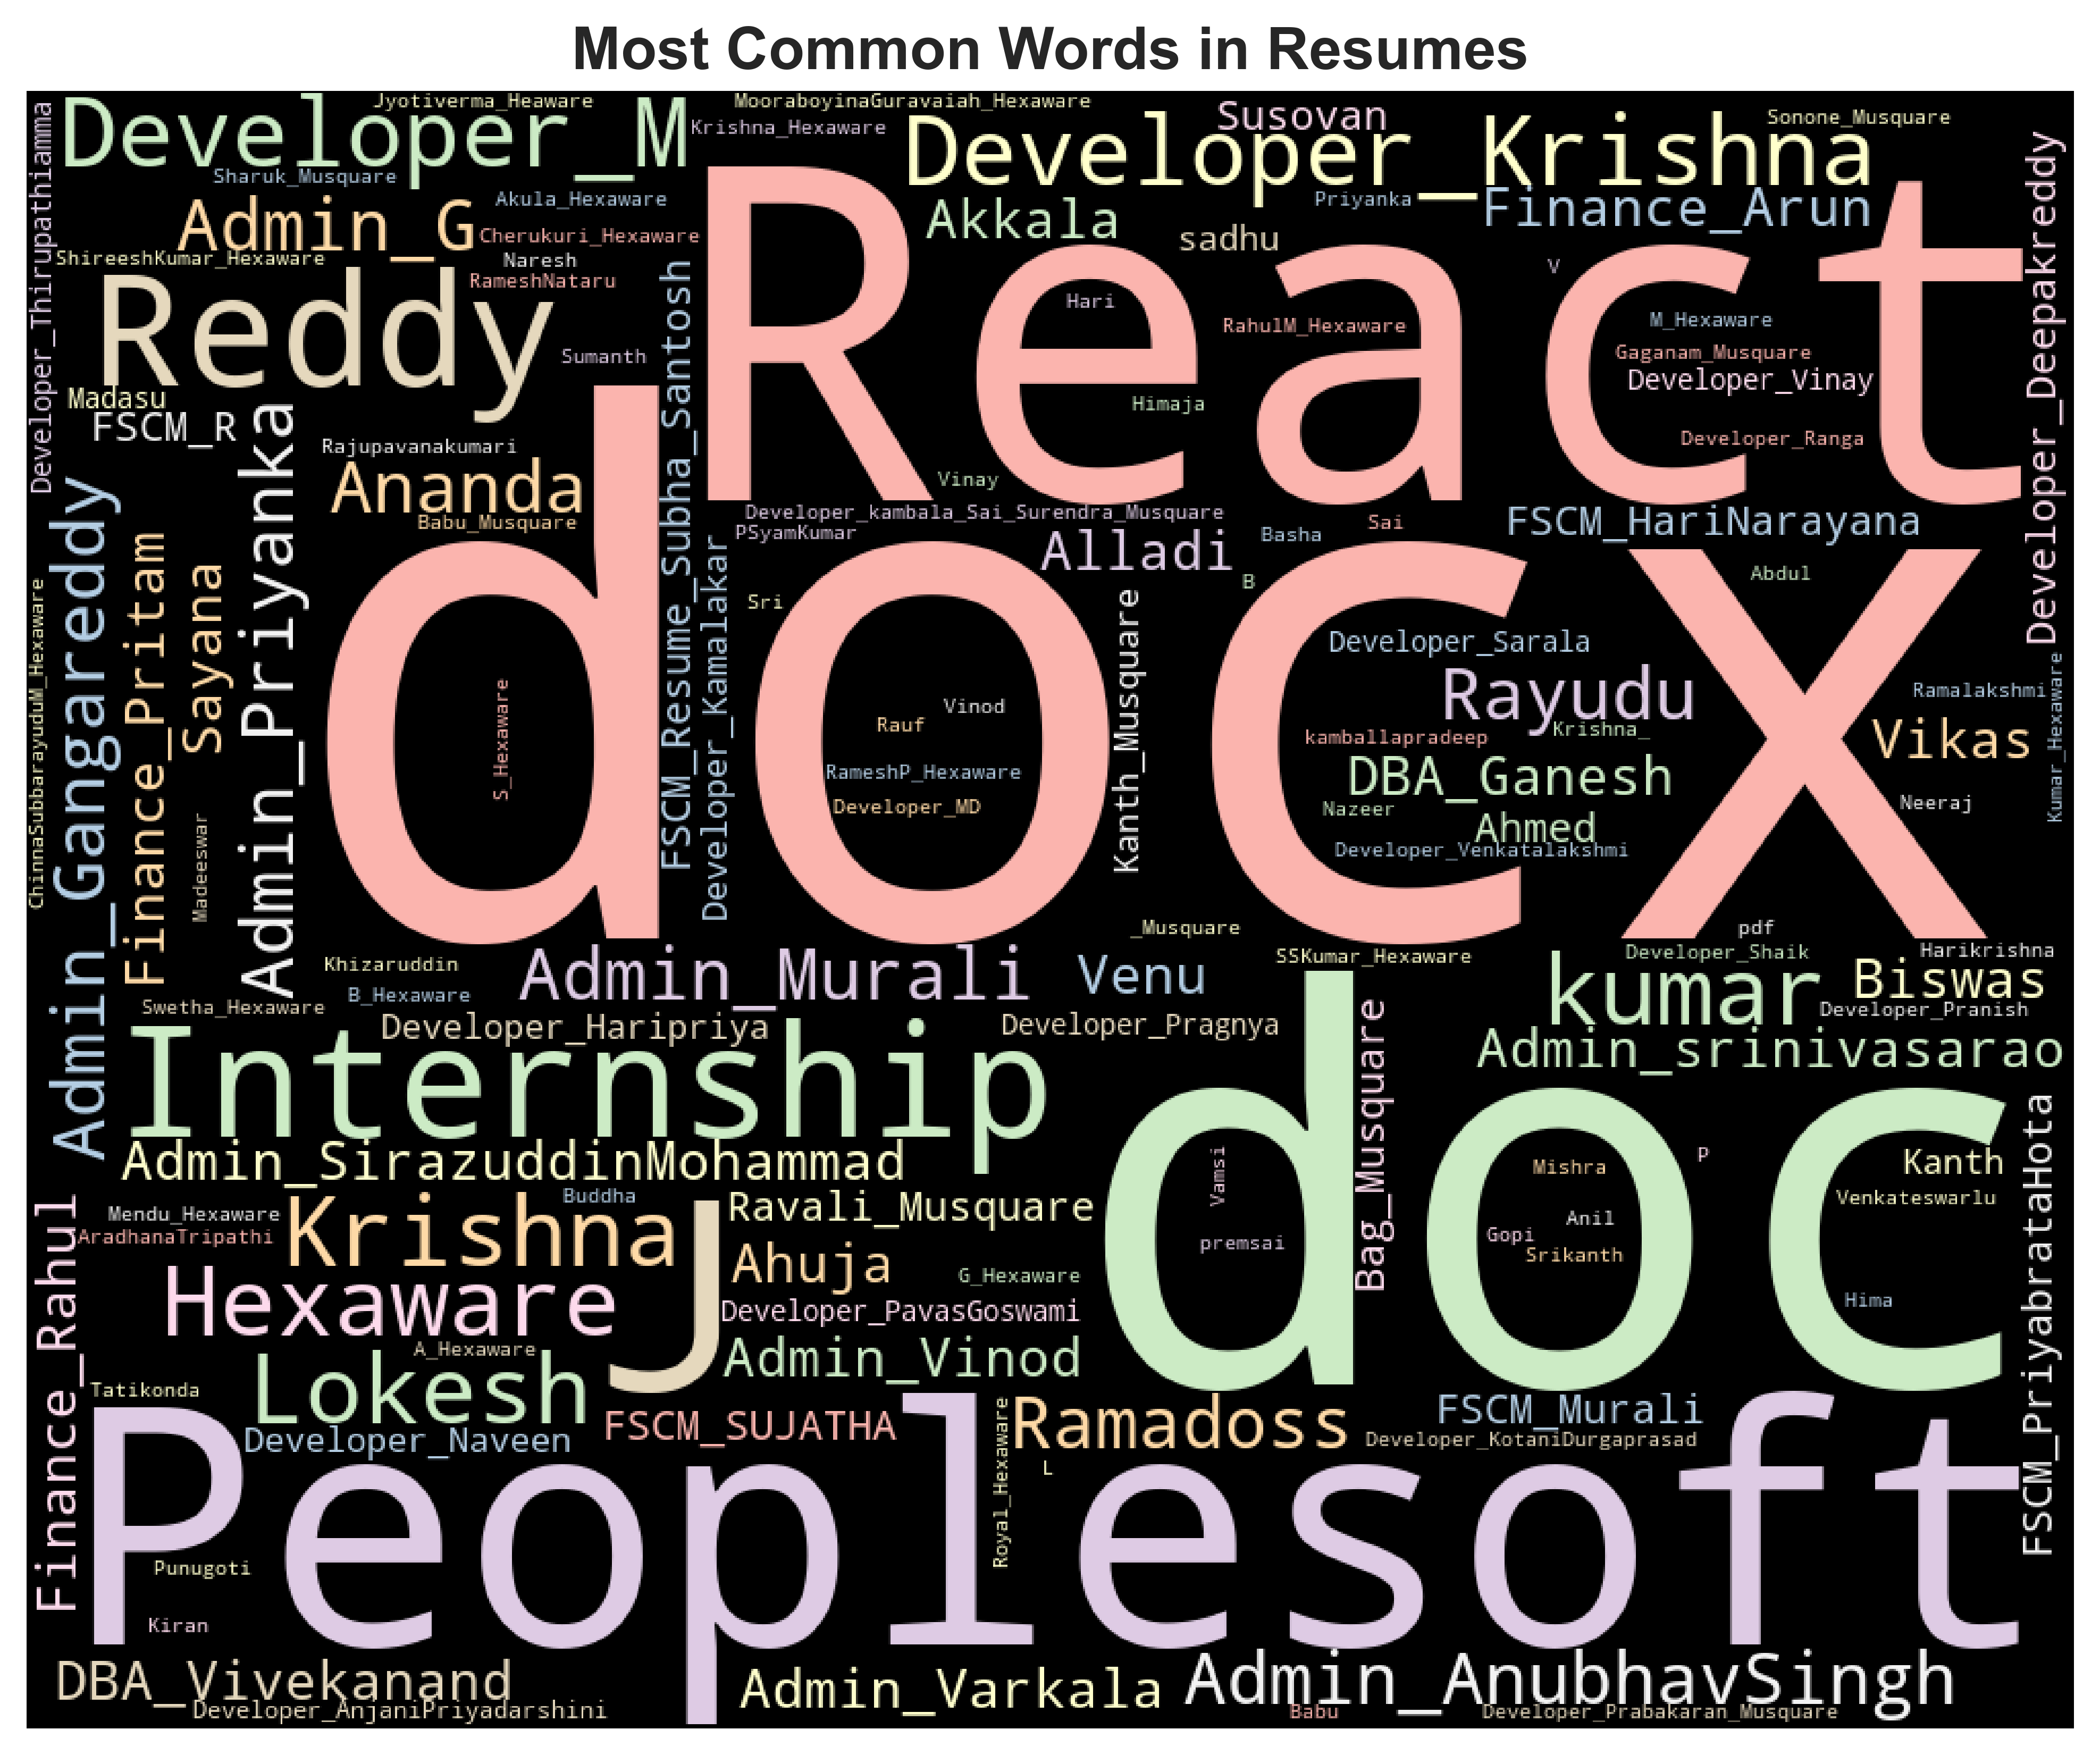

In [46]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

# word_cloud.to_file('IMG/Word_Clowds.png')
plt.show()

### 4.4 Number of Numerics

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

In [48]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category"])

resume_data

Category                          Resume_Details  LebelEncoding
0   PeopleSoft      Peoplesoft Admin_AnubhavSingh.docx              0
1   PeopleSoft    Peoplesoft Admin_G Ananda Rayudu.doc              0
2   PeopleSoft         Peoplesoft Admin_Gangareddy.doc              0
3   PeopleSoft            Peoplesoft Admin_Murali.docx              0
4   PeopleSoft  Peoplesoft Admin_Priyanka Ramadoss.doc              0
..         ...                                     ...            ...
74     Workday              Sri Krishna S_Hexaware.doc              3
75     Workday                  Srikanth-Hexaware.docx              3
76     Workday                   SSKumar_Hexaware.docx              3
77     Workday            Venkateswarlu B_Hexaware.doc              3
78     Workday               Vinay Kumar_Hexaware.docx              3

[79 rows x 3 columns]

## 5. Text Pre-Processing

### 5.1 Using Regular Expression

In [49]:
resume_data.describe()

LebelEncoding
count      79.000000
mean        1.455696
std         1.141271
min         0.000000
25%         0.500000
50%         1.000000
75%         3.000000
max         3.000000

In [50]:
resume_data.isnull().sum()

Category          0
Resume_Details    0
LebelEncoding     0
dtype: int64

### 5.2 Clean Text from Resume

In [51]:
x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

### 5.3 Save the Clean Data in new CSV File

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((59,), (20,))

In [53]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [54]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [55]:
x_train.shape, x_test.shape

((59, 105), (20, 105))

## 6. Named Entity Recognition (NER)

In [56]:
print(y_train),print(y_test)

['PeopleSoft' 'React JS Developer' 'PeopleSoft' 'Workday' 'SQL Developer'
 'SQL Developer' 'React JS Developer' 'PeopleSoft' 'React JS Developer'
 'PeopleSoft' 'React JS Developer' 'SQL Developer' 'React JS Developer'
 'React JS Developer' 'Workday' 'React JS Developer' 'SQL Developer'
 'React JS Developer' 'PeopleSoft' 'React JS Developer'
 'React JS Developer' 'Workday' 'PeopleSoft' 'PeopleSoft' 'PeopleSoft'
 'SQL Developer' 'Workday' 'Workday' 'Workday' 'React JS Developer'
 'Workday' 'React JS Developer' 'SQL Developer' 'Workday'
 'React JS Developer' 'Workday' 'SQL Developer' 'Workday' 'PeopleSoft'
 'PeopleSoft' 'SQL Developer' 'PeopleSoft' 'Workday' 'SQL Developer'
 'PeopleSoft' 'Workday' 'PeopleSoft' 'SQL Developer' 'Workday' 'Workday'
 'Workday' 'PeopleSoft' 'React JS Developer' 'React JS Developer'
 'React JS Developer' 'PeopleSoft' 'React JS Developer'
 'React JS Developer' 'Workday']
['PeopleSoft' 'PeopleSoft' 'React JS Developer' 'Workday' 'Workday'
 'React JS Developer' 'R

(None, None)

## 7. Parts Of Speech (POS) Tagging

In [57]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.69
Accuracy of  test set    : 0.65
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       0.50      1.00      0.67         6
     SQL Developer       0.00      0.00      0.00         4
           Workday       0.67      0.40      0.50         5

          accuracy                           0.65        20
         macro avg       0.54      0.60      0.54        20
      weighted avg       0.57      0.65      0.57        20




In [58]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.80
Classification report for classifier DecisionTreeClassifier():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       0.50      0.75      0.60         4
           Workday       0.67      0.40      0.50         5

          accuracy                           0.80        20
         macro avg       0.79      0.79      0.78        20
      weighted avg       0.82      0.80      0.80        20




### 7.1 Filtering out only the Nouns and Verbs from the Text to Tokens

In [59]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.80
Classification report for classifier RandomForestClassifier(n_estimators=200):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       0.50      0.75      0.60         4
           Workday       0.67      0.40      0.50         5

          accuracy                           0.80        20
         macro avg       0.79      0.79      0.78        20
      weighted avg       0.82      0.80      0.80        20




### 7.2 Counting all the Nouns and Verbs present in the Tokens of words

In [60]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.80
Classification report for classifier SVC():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       0.00      0.00      0.00         4
           Workday       0.56      1.00      0.71         5

          accuracy                           0.80        20
         macro avg       0.64      0.75      0.68        20
      weighted avg       0.69      0.80      0.73        20




### 7.3 Visualizing the Result of Top 20 Nouns and Verbs most Frequently

In [61]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.80
Classification report for classifier LogisticRegression():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       0.50      0.75      0.60         4
           Workday       0.67      0.40      0.50         5

          accuracy                           0.80        20
         macro avg       0.79      0.79      0.78        20
      weighted avg       0.82      0.80      0.80        20




In [62]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.76
Accuracy of  test set    : 0.65
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       0.50      1.00      0.67         6
     SQL Developer       0.00      0.00      0.00         4
           Workday       0.67      0.40      0.50         5

          accuracy                           0.65        20
         macro avg       0.54      0.60      0.54        20
      weighted avg       0.57      0.65      0.57        20




In [63]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.83
Accuracy of  test set    : 0.80
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       0.00      0.00      0.00         4
           Workday       0.56      1.00      0.71         5

          accuracy                           0.80        20
         macro avg       0.64      0.75      0.68        20
      weighted avg       0.69      0.80      0.73        20




In [64]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.80
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       0.50      0.75      0.60         4
           Workday       0.67      0.40      0.50         5

          accuracy                           0.80        20
         macro avg       0.79      0.79      0.78        20
      weighted avg       0.82      0.80      0.80        20




# THE END !!!

In [65]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.60
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                    precision    recall  f1-score   support

        PeopleSoft       0.62      1.00      0.77         5
React JS Developer       0.55      1.00      0.71         6
     SQL Developer       1.00      0.25      0.40         4
           Workday       0.00      0.00      0.00         5

          accuracy                           0.60        20
         macro avg       0.54      0.56      0.47        20
      weighted avg       0.52      0.60      0.48        20




In [66]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

Models  Train_Accuracy(%)  Test_Accuracy(%)  \
0                KNN Classifier           0.694915              0.65   
1       DecisionTree Classifier           1.000000              0.80   
2       RandomForest Classifier           1.000000              0.80   
3                SVM Classifier           1.000000              0.80   
4           Logistic Regression           1.000000              0.80   
5            Bagging Classifier           0.762712              0.65   
6           AdaBoost Classifier           0.830508              0.80   
7  Gradient Boosting Classifier           1.000000              0.80   
8        Naive Bayes Classifier           1.000000              0.60   

   Precision(%)  Recall(%)  F1-Score(%)  
0          0.54       0.60         0.54  
1          0.79       0.79         0.78  
2          0.79       0.79         0.78  
3          0.64       0.75         0.68  
4          0.79       0.79         0.78  
5          0.54       0.60         0.54  
6          0.64       0.75         0.68  
7          0.79       0.79         0.78  
8          0.54       0.56         0.47

In [67]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

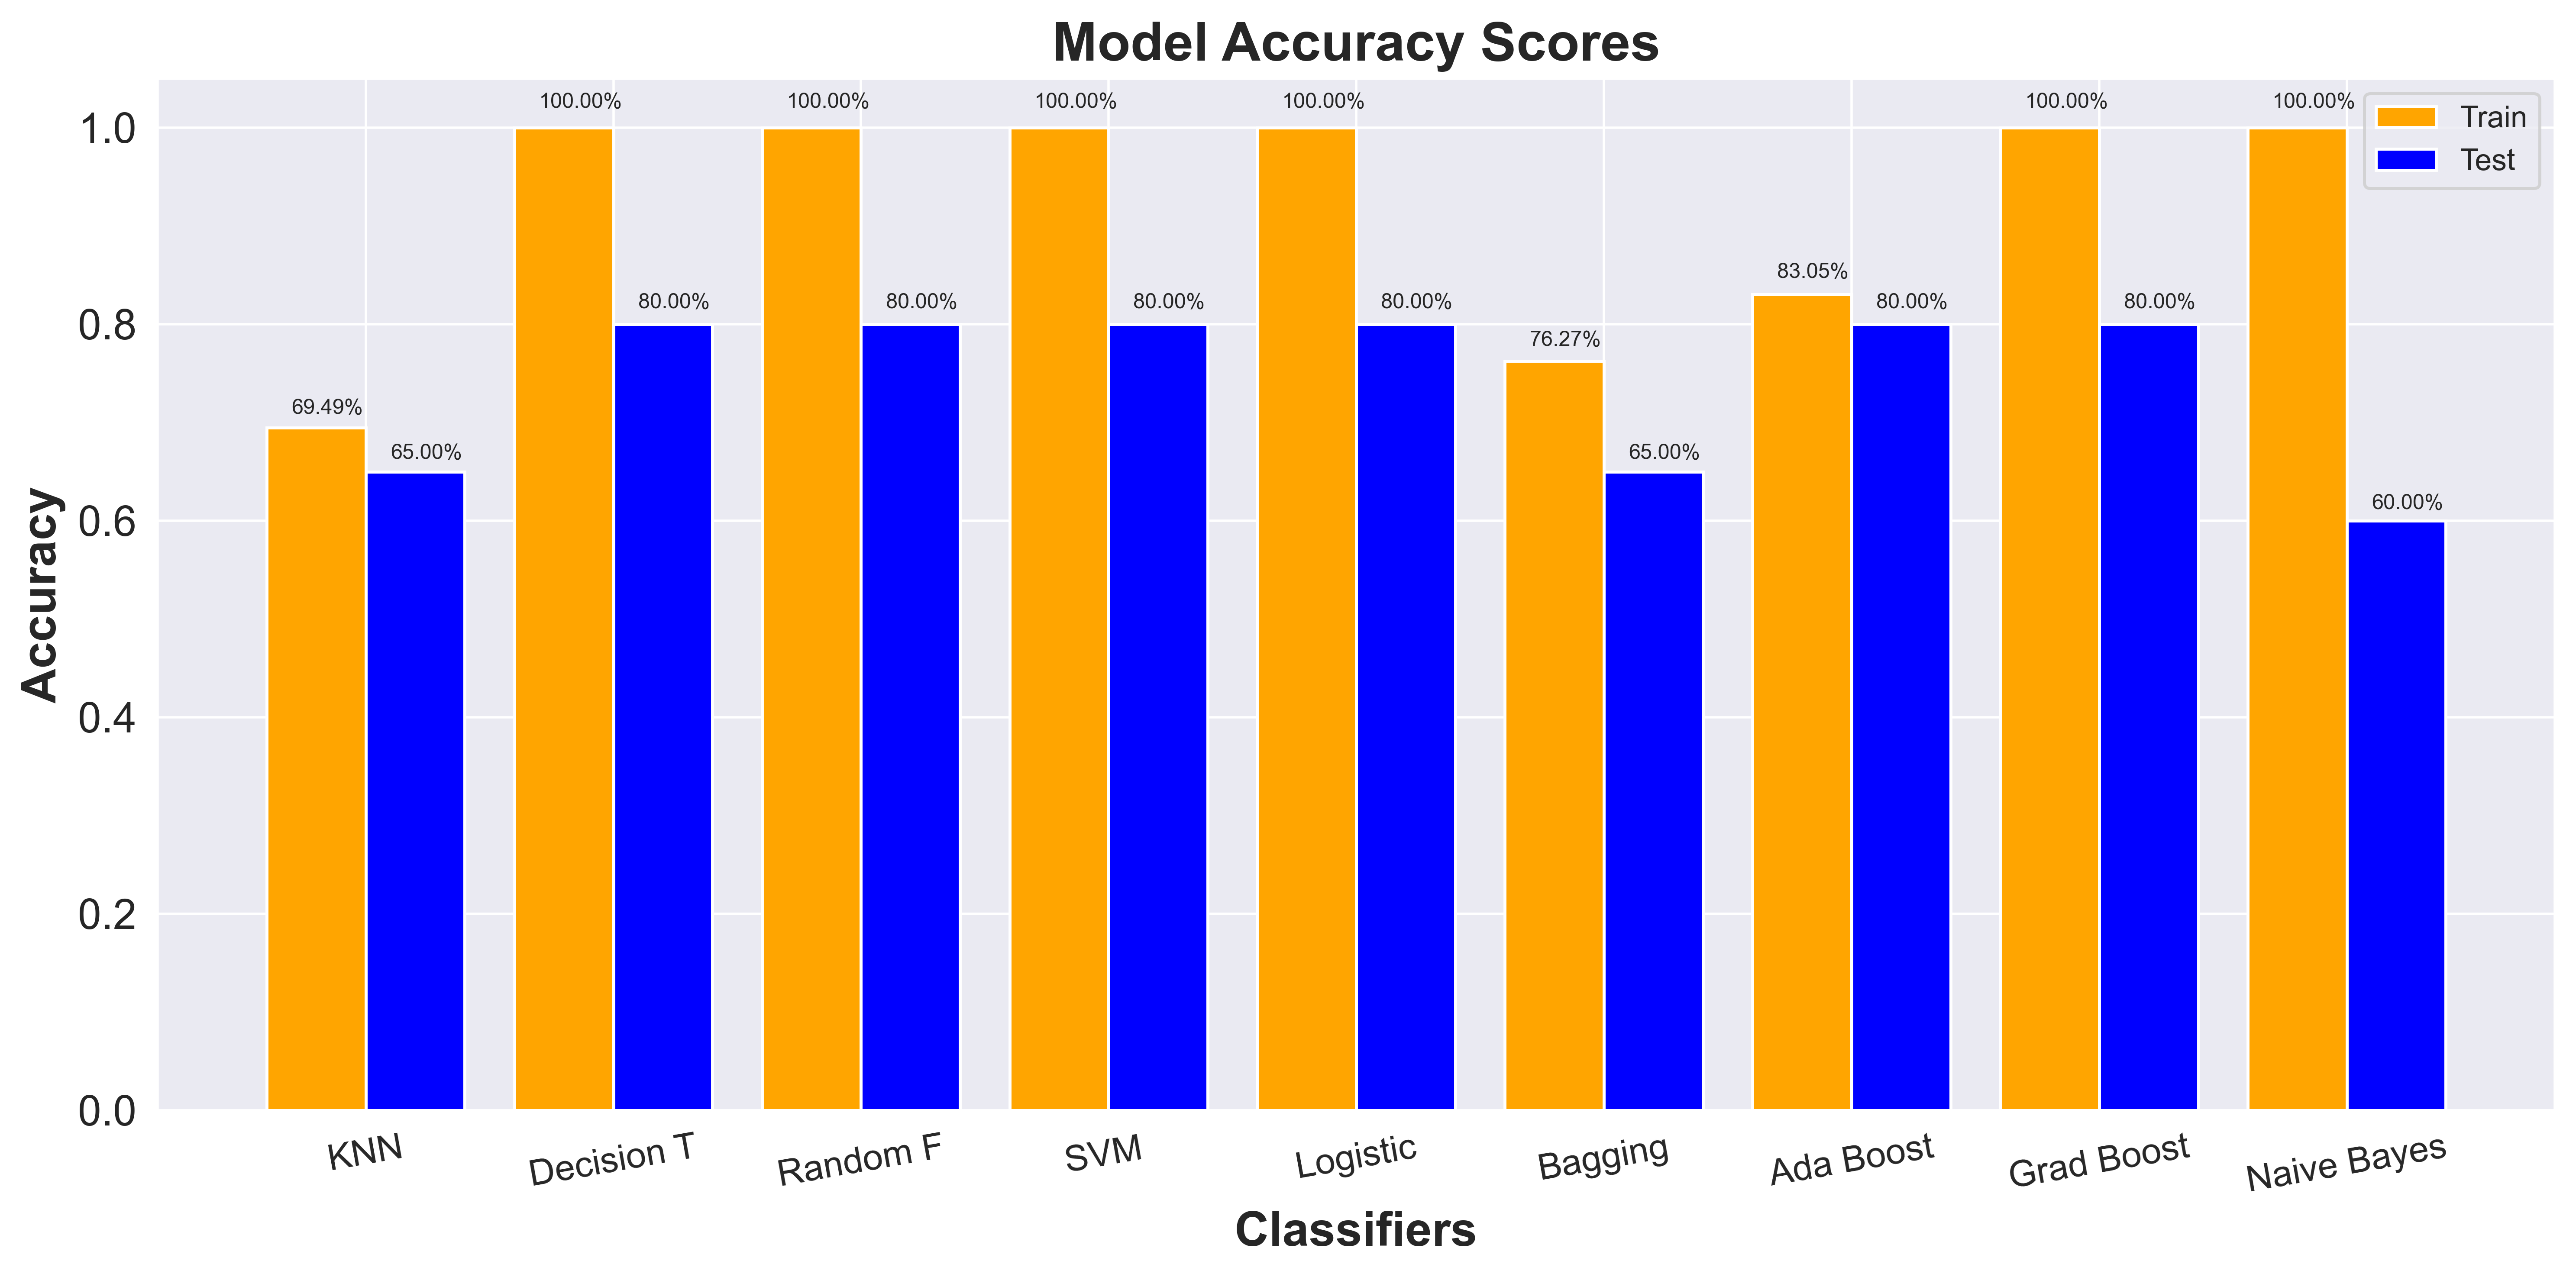

In [69]:
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)

for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()


In [71]:
import pickle
filename = 'modelDT.pkl'
pickle.dump(model_DT,open(filename,'wb'))


import pickle
filename = 'vector.pkl'
pickle.dump(tfidf_vector,open(filename,'wb'))